**SVD**

SVD is a matrix decomposition technique that breaks down a matrix A (for example, an image) into three components:

A = U Σ Vᵗ

U: an orthonormal matrix representing row features (row basis).

Σ (sigma): a diagonal matrix containing singular values (representing the strength or “energy” of the features).

Vᵗ: the transpose of an orthonormal matrix V representing column features (column basis)..

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from io import BytesIO
import IPython
from IPython.display import display
import matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving butterfly.jpg to butterfly.jpg


In [ ]:
for filename in uploaded.keys():
    image = imread(filename)
    if image.ndim == 3:
        grayscale = (0.2989 * image[:, :, 0] +
                     0.5870 * image[:, :, 1] +
                     0.1140 * image[:, :, 2])
    else:
        grayscale = image.copy()

    break

In [ ]:
def compress_image_svd(img, k):
    U, S, Vt = np.linalg.svd(img, full_matrices=False)
    S_matrix = np.diag(S[:k])
    compressed = U[:, :k] @ S_matrix @ Vt[:k, :]
    return compressed

In [ ]:
ks = [5, 20, 50, 100, 200]
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

(np.float64(-0.5), np.float64(1799.5), np.float64(1199.5), np.float64(-0.5))

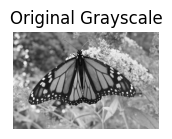

In [ ]:
plt.subplot(2, 3, 1)
plt.imshow(grayscale, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

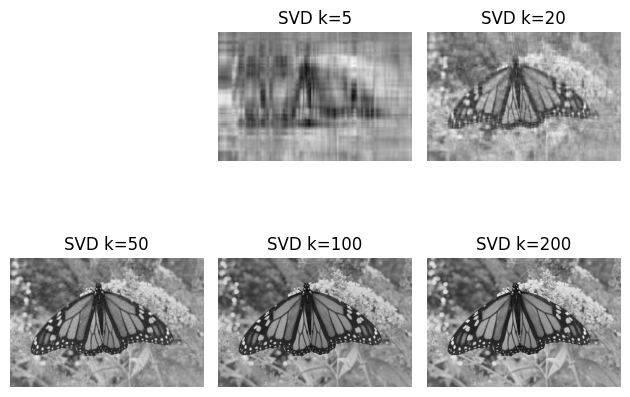

In [ ]:
for i, k in enumerate(ks):
    compressed = compress_image_svd(grayscale, k)
    plt.subplot(2, 3, i + 2)
    plt.imshow(compressed, cmap='gray')
    plt.title(f"SVD k={k}")
    plt.axis('off')

plt.tight_layout()
plt.show()